### Problem Description

###### Your Client FinMan is a financial services company that provides various financial services like loan, investment funds, insurance etc. to its customers. FinMan wishes to cross-sell health insurance to the existing customers who may or may not hold insurance policies with the company. 

###### The company recommend health insurance to it's customers based on their profile once these customers land on the website. Customers might browse the recommended health insurance policy and consequently fill up a form to apply. When these customers fill-up the form, their Response towards the policy is considered positive and they are classified as a lead.


###### Once these leads are acquired, the sales advisors approach them to convert and thus the company can sell proposed health insurance to these leads in a more efficient manner.

Now the company needs your help in building a model to predict whether the person will be interested in their proposed Health plan/policy given the information about:

Demographics (city, age, region etc.)

Information regarding holding policies of the customer

Recommended Policy Information


### Data Dictionary of historical data

###### Importing essential libraries

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from IPython.display import display
from scipy import stats
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier
import xgboost as xgb
import lightgbm
from sklearn.model_selection import GridSearchCV

###### Reading Available Data

In [186]:
df = pd.read_csv("train_Df64byy.csv")
df.shape

(50882, 14)

In [187]:
# Top index Records of data
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [188]:
# Droping ID Column as it will not make any of sense
df.drop(columns=['ID'],inplace=True)

###### Categorical  and Numerical Columns

In [166]:
print("Categorical Feature List - \n",['City_Code','Region_Code','Accomodation_Type','Reco_Insurance_TypeIs_Spouse','Health Indicator','Holding_Policy_Duration','Holding_Policy_Type','Reco_Policy_Cat'],'\n')
print("Numerical Feature List - \n",['Upper_Age','Lower_Age','Reco_Policy_Premium'])

Categorical Feature List- 
 ['City_Code', 'Region_Code', 'Accomodation_Type', 'Reco_Insurance_TypeIs_Spouse', 'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat'] 

Numerical Feature List - 
 ['Upper_Age', 'Lower_Age', 'Reco_Policy_Premium']


### Univariate analysis

In [159]:
# Lets do the basic data check using visualization and basic statistical to get univariate summary of each feature individually

###### 1. City_Code

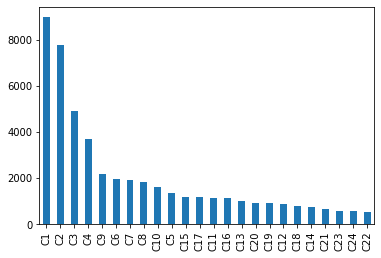

In [7]:
# Ploting fequency plot for column City_Code(City codes) with more then 500 distinct counts
df.City_Code.value_counts()[df.City_Code.value_counts()>=500].plot(kind='bar');

In [8]:
# Missing values in City_Code column
df['City_Code'].isna().sum()

0

In [9]:
# Checking the caridnality :- Unique city codes present in data
df['City_Code'].nunique()

36

In [10]:
# Conculsion : 
# 1. From fugure we can identify that cities with city code C1,C2,C3,C4 have more presence as compared to rest of the cities
# 2. And no missing value in column
# 3. Has bit high cardinality

###### 2. Region_Code

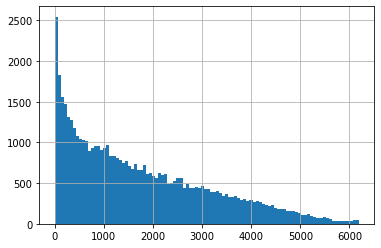

In [11]:
# Ploting histogram plot of Region Codes(Geo Information)
df.Region_Code.hist(bins=100);

In [12]:
# Missing value in Region_Code
df.Region_Code.isna().sum()

0

In [13]:
# Checking the caridnality
df['Region_Code'].nunique()

5316

In [14]:
# Conculsion:
# Major of the region_code lies between range 0-1000
# No missing value in column
# Have quite high cardinality(looks like the column is not categorical in nature by looking at values)
# We can drop the feature if the doesnot hold strong relation ship with Response

###### 3. Accomodation_Type

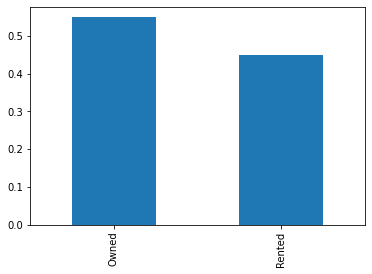

In [15]:
# Ploting fequency percentage plot for column Accomodation_Type
df.Accomodation_Type.value_counts(normalize=True).plot(kind='bar');

In [16]:
# Missing values in Accomodation_Type column
df['Accomodation_Type'].isna().sum()

0

In [17]:
# Conculsion : 
# 1. From fugure we can identify that more people are owing an house then rented people but the difference is not that much 
# great
# 2. And no missing value in column

###### 4. Reco_Insurance_Type

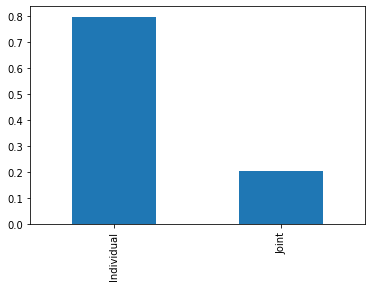

In [18]:
# Ploting fequency percentage plot for column Recommended Insurance Type
df.Reco_Insurance_Type.value_counts(normalize=True).plot(kind='bar');

In [19]:
# Missing values in Reco_Insurance_Type column
df['Reco_Insurance_Type'].isna().sum()

0

In [20]:
# Conculsion : 
# 1. From figure we can identify that recommended policies are generally individual in nature(company is recommending the 
# policy to customer to take policy for only one person)
# 2. And no missing value in column

###### 6. Upper_Age

In [21]:
df['Upper_Age'].describe()

count    50882.000000
mean        44.856275
std         17.310271
min         18.000000
25%         28.000000
50%         44.000000
75%         59.000000
max         75.000000
Name: Upper_Age, dtype: float64

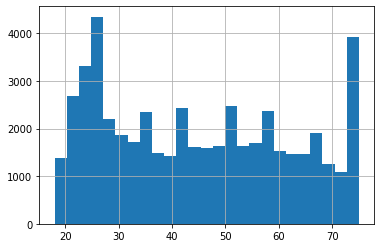

In [22]:
df['Upper_Age'].hist(bins=25);

In [23]:
df['Upper_Age'].isna().sum()

0

In [24]:
# Conclusion:
# No outlier in data
# All Age bins have good amount of data where some of the age bins have greater number of customers
# Mean - 44, std - 17, min - 18 and max - 75
# No missing value

###### 7. Lower_Age	 

In [25]:
df['Lower_Age'].describe()

count    50882.000000
mean        42.738866
std         17.319375
min         16.000000
25%         27.000000
50%         40.000000
75%         57.000000
max         75.000000
Name: Lower_Age, dtype: float64

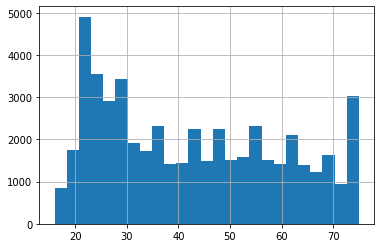

In [26]:
df['Lower_Age'].hist(bins=25);

In [27]:
df['Lower_Age'].isna().sum()

0

In [28]:
# Conclusion:
# No outlier in data
# All Age bins have good amount of data where as early age bins have greater number of customers
# Mean - 42, std - 17, min - 16 and max - 75
# No missing value
# Resembles with Upper Age Column

###### 8. Is_Spouse

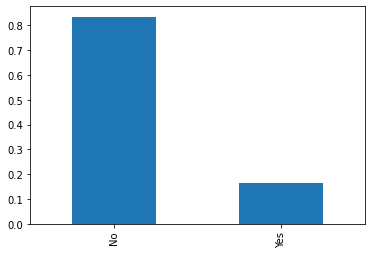

In [29]:
# Ploting fequency percentage plot for column Is spouse present or not
df.Is_Spouse.value_counts(normalize=True).plot(kind='bar');

In [30]:
# Missing values in Is_Spouse column
df['Is_Spouse'].isna().sum()

0

In [31]:
# Conculsion : 
# 1. From figure we can identify that generally individual who apply/query for policy are unmarried
# 2. And no missing value in column

###### 9. Health Indicator

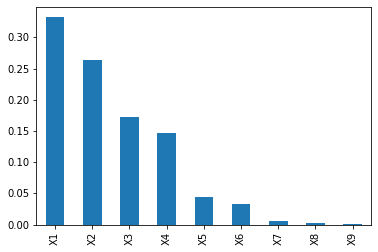

In [32]:
# Ploting fequency percentage plot for column Health Indicator
df['Health Indicator'].value_counts(normalize=True).plot(kind='bar');

In [33]:
# Missing values in Is_Spouse column in percentage
round(df['Health Indicator'].isna().sum()*100/df.shape[0],2)

22.98

In [34]:
# Conculsion : 
# 1. From figure we can identify that majorly X1,X2,X3,X4 indicators values are present for majority of customer
# 2. 23% missing value in column
# 3. Need to do Missing value impuation

###### 10. Holding_Policy_Duration

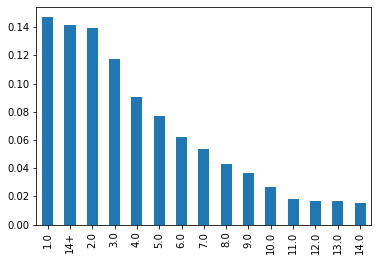

In [35]:
# Ploting fequency percentage plot for column Holding Policy Duration 
# (Duration(in years) of holding policy(policy that cust has already subscribed to with the cmp))
df['Holding_Policy_Duration'].value_counts(normalize=True).plot(kind='bar');

In [36]:
# Missing values in Holding Policy Duration column in percentage
round(df['Holding_Policy_Duration'].isna().sum()*100/df.shape[0],2)

39.8

In [37]:
# Conculsion : 
# 1. From figure We can identify that majorly duration of the polices already having by customers are less than 5 years
# 2. 40% missing value in column
# 3. Needs to categorized missing as customer not having policy(Assumption taken that places where data not present means 
# customer doesnt have any ongoing policy)
# 4. Converting this column to numerical by change the 14+ value to 15

###### 11. Holding_Policy_Type

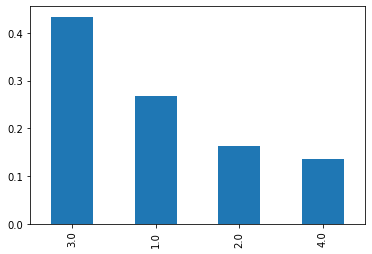

In [38]:
# Ploting fequency percentage plot for column Type of holding policy by customer 
df['Holding_Policy_Type'].value_counts(normalize=True).plot(kind='bar');

In [39]:
# Missing values in Holding_Policy_Type column in percentage
round(df['Holding_Policy_Type'].isna().sum()*100/df.shape[0],2)

39.8

In [40]:
# Conculsion : 
# 1. From figure we can identify that policy type 3 and 1 is generally being adopted by customers
# 2. 40% missing value in column
# 3. Needs to categorized missing as customer not having policy(Assumption taken that places where data not present means 
# customer doesnt have any ongoing policy)

###### 12. Reco_Policy_Cat

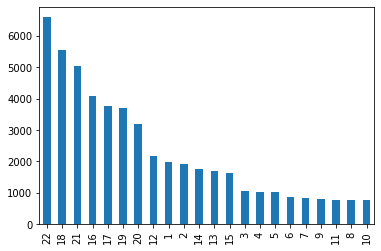

In [41]:
# Ploting fequency plot for column : Encoded value for recommended health insurance 
df['Reco_Policy_Cat'].value_counts().plot(kind='bar');

In [42]:
# Missing values in Holding_Policy_Type column in percentage
round(df['Reco_Policy_Cat'].isna().sum()*100/df.shape[0],2)

0.0

In [43]:
# Conculsion : 
# 1. From figure we can identify that category 22,18,21,16,17,19,20 policies are generally being offered
# 2. No missing categories
# 3. We can cross validate which were the policies which was offered and actually customer purchased them

###### 13. Reco_Policy_Premium

In [44]:
# Statistical summary of Recommened policy premium
df['Reco_Policy_Premium'].describe()

count    50882.000000
mean     14183.950069
std       6590.074873
min       2280.000000
25%       9248.000000
50%      13178.000000
75%      18096.000000
max      43350.400000
Name: Reco_Policy_Premium, dtype: float64

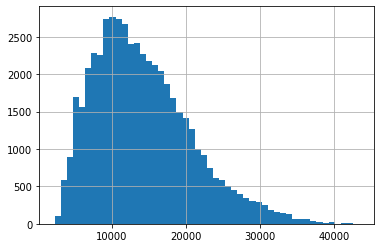

In [45]:
df['Reco_Policy_Premium'].hist(bins=50);

In [46]:
df['Reco_Policy_Premium'].isna().sum()

0

In [47]:
# Conclusion:
# No outlier in data but the distribution looked skewed so needs to take care about that
# Mean - 14183.95, std - 6590.07, min - 2280 and max - 43350
# No missing value

###### 14. Response

In [193]:
# fequency percentage for Target variable :- Response (Which customer has purchased and which not, when approached) 
df['Response'].value_counts()

0    38673
1    12209
Name: Response, dtype: int64

In [49]:
# Missing values in Response column in percentage
round(df['Response'].isna().sum()*100/df.shape[0],2)

0.0

In [50]:
# Conculsion : 
# 1. From figure we can identify that 76% have not purchased the policy while 23% have purchased and its clear our dependent
# variable is unbalanced
# 2. 0% missing value in column
# 3. Needs to work on balance them when modelling with using SMOTE and cost sensitive models

### Bivariate Analysis

In [167]:
# Lets do some analysis of target variables and see how it is behaving with respect to characteristics of independent variables

###### 1. Which city has highest lead generation

In [20]:
df_crosstab=pd.crosstab(df.City_Code,df.Response)
df_crosstab.div(df_crosstab.sum(axis=1), axis=0).sort_values([1],ascending=False).head(5)

Response,0,1
City_Code,,
C30,0.689655,0.310345
C32,0.712500,0.287500
C35,0.714286,0.285714
C34,0.723077,0.276923
C23,0.734242,0.265758


In [22]:
# Looks the cities C1,C2,C3,C4 which appeared more doesnot have that much power of lead generation as with cities 
# C30,C32,C35,C34,C23

###### 2. Does people having house have greater chance of lead generation?

In [21]:
df_crosstab=pd.crosstab(df.Accomodation_Type,df.Response)
df_crosstab.div(df_crosstab.sum(axis=1), axis=0).sort_values([1],ascending=False).head(5)

Response,0,1
Accomodation_Type,,
Owned,0.758041,0.241959
Rented,0.762505,0.237495


In [168]:
# From data it seems, It hardly matters for lead generation to have a house or not

###### 3. Does bachelor have lesser chance of lead generation 

In [24]:
df_crosstab=pd.crosstab(df.Is_Spouse,df.Response)
df_crosstab.div(df_crosstab.sum(axis=1), axis=0).sort_values([1],ascending=False).head(5)

Response,0,1
Is_Spouse,,
Yes,0.756352,0.243648
No,0.760787,0.239213


In [26]:
pd.crosstab(df.Is_Spouse,df.Response)

Response,0,1
Is_Spouse,,
No,32303,10157
Yes,6370,2052


In [27]:
# The event percentage for both of the things are same, but it has been seen from the data that normally bachelor's are
# target more.
# might be this feature will not add value if added in model

###### 4. Customers that doesn't hold policy have greater lead generation chances

In [31]:
print('Total number of records',df.shape[0])
print('Number of records with having no eariler policies', df.Holding_Policy_Type.isna().sum())
print('Number of records with having existing policies', df.shape[0]-df.Holding_Policy_Type.isna().sum())

Total number of records 50882
Number of records with having no eariler policies 20251
Number of records with having existing policies 30631


In [34]:
df.Holding_Policy_Type.value_counts(dropna=False)

NaN    20251
3.0    13279
1.0     8173
2.0     5005
4.0     4174
Name: Holding_Policy_Type, dtype: int64

In [43]:
df[df.Holding_Policy_Type.notnull()]['Response'].value_counts(normalize=True)

0    0.759394
1    0.240606
Name: Response, dtype: float64

In [44]:
df[df.Holding_Policy_Type.isnull()]['Response'].value_counts(normalize=True)

0    0.761049
1    0.238951
Name: Response, dtype: float64

In [45]:
# From data it looks like the event percentage is same for both of the cases when customer is already holding some policy
# or not

#### Correaltions

###### Finding  correlation among continous variables 

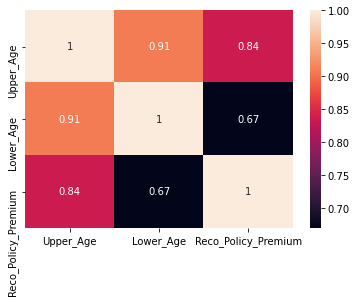

In [51]:
corr = df[['Upper_Age','Lower_Age','Reco_Policy_Premium']].corr(method = 'spearman')
sns.heatmap(corr, annot = True)
plt.show()

In [169]:
# Consulsion
# We can see that upper age and lower age is quite correlated and even premium in health policies are basically dependent on
# Upper age so we can drop the lower age 

In [170]:
# Lets see the correlation of UpperAge with Response variable using 2 sample t-test; whether the upper age is significantly 
# different for different group of response

In [183]:
stats.mannwhitneyu(df[df['Response']==1]['Upper_Age'], df[df['Response']==0]['Upper_Age'])

MannwhitneyuResult(statistic=234680180.5, pvalue=0.16130378028724446)

In [173]:
print(df[df['Response']==1]['Upper_Age'].mean())
print(df[df['Response']==0]['Upper_Age'].mean())

44.9416823654681
44.82931244020376


In [185]:
# P-value is 0.1 that means the means of the two differnt groups are significantly same for siginificance level 0.05 but 
# for sinificance level 0.1 we can reject the null hypothesis and say the distribution are significanltly different

In [178]:
# Lets also check the correlation of independent variables(Categorical) and dependent variable(categorical i.e., Response)

In [62]:
cat_cols=['City_Code','Accomodation_Type','Reco_Insurance_Type','Health Indicator','Holding_Policy_Type','Reco_Policy_Cat','Is_Spouse']

In [63]:
for f in cat_cols:
    chitest = chi2_contingency(pd.crosstab(df[f], df['Response']))   
    print(f,"and Response vars Chi-Sqaure test's P value=",chitest[1])

City_Code and Response vars Chi-Sqaure test's P value= 0.7251180856306821
Accomodation_Type and Response vars Chi-Sqaure test's P value= 0.24491793264478945
Reco_Insurance_Type and Response vars Chi-Sqaure test's P value= 0.026534842934215437
Health Indicator and Response vars Chi-Sqaure test's P value= 0.43865402848058554
Holding_Policy_Type and Response vars Chi-Sqaure test's P value= 0.42634578504540277
Reco_Policy_Cat and Response vars Chi-Sqaure test's P value= 0.0
Is_Spouse and Response vars Chi-Sqaure test's P value= 0.3917208801956691


In [64]:
# Means Only Reco_Policy_Cat and Reco_Insurance_Type holds strong relation/dependency with Response variable.
# So we can drop of categorical features from our modelling excerise
# City_Code','Accomodation_Type', 'Health Indicator','Holding_Policy_Type', 'Is_Spouse'

In [65]:
# Lets check the Relationship between Categorical and Continous values

In [66]:
# Lets check the one for categorical features with only 2 category and continuous variables using Point Biserial Correlation

C:\Users\ajay.sharma\Anaconda3\lib\site-packages\pandas\core\series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


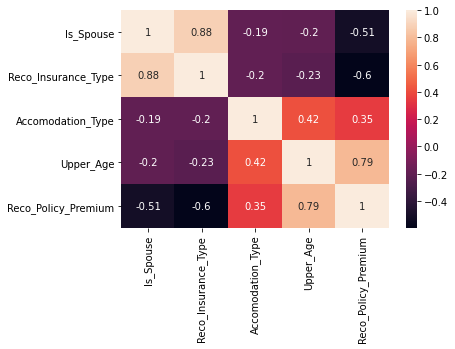

In [68]:
bi_cat_vars = ['Is_Spouse','Reco_Insurance_Type','Accomodation_Type']
cont_vars = ['Upper_Age','Reco_Policy_Premium']
df_temp=df[bi_cat_vars+cont_vars]

# Convert the value of column into int
for cat in bi_cat_vars:
    df_temp[cat].replace({df_temp[cat].value_counts().index[0]: 1, df_temp[cat].value_counts().index[1]: 0},inplace=True)

sns.heatmap(df_temp.corr(), annot = True)
plt.show()

In [74]:
# From Here we can see that Is_Spouse is correlated with Recommended Insurance Type
# So we can drop the Is_Spouse varible in modelling

In [75]:
# Finally columns to drop 'Lower_Age','Region_Code', 'Is_Spouse', 'City_Code'

##### Missing value imputation

In [153]:
# Columns having missing values and total number of rows with missing values 
pd.Series(df.isna().sum()[df.isna().sum()>0])

Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
dtype: int64

In [189]:
# Will handle missing value for only Health_Indicator because Holding_Policy_Duration and Holding_Policy_Type is missed for 
# the customers which dont hold any policy with company

In [190]:
# Handling missing values in Holding_Policy_Duration and Holding_Policy_Type
# Converting the Holding_Policy_Duration and Holding_Policy_Type into category and handling the missing value by placing 'Missing'
# Category
df['Holding_Policy_Duration'] = pd.Categorical(df.Holding_Policy_Duration)
df['Holding_Policy_Type'] = pd.Categorical(df.Holding_Policy_Type)
df['Holding_Policy_Duration'] = np.where(df['Holding_Policy_Duration'].isnull(),'Missing',df['Holding_Policy_Duration'])
df['Holding_Policy_Type'] = np.where(df['Holding_Policy_Type'].isnull(),'Missing',df['Holding_Policy_Type'])

In [191]:
# Handing missing values in Health Indicator
# Will use modelling approach i.e., Tree Based model which will try to predict the missing instances with learning from
# instances where data is present

In [192]:
# So before that we need to encode all the features which are string in nature to numerical format as 
# models understand only english/string

In [198]:
# Encoding

# One hot encoding for some categorical columns
cat = ['Accomodation_Type','Reco_Insurance_Type','Holding_Policy_Type','Reco_Policy_Cat']
df_ = pd.get_dummies(df.drop(['Lower_Age','Region_Code', 'Is_Spouse', 'City_Code'],axis=1), columns = cat)

# Label encoding
# Holding_Policy_Duration
le=preprocessing.LabelEncoder()
df_['Holding_Policy_Duration']=le.fit_transform(df_['Holding_Policy_Duration'])

In [199]:
clf = RandomForestClassifier()
clf.fit(df_.dropna().drop(['Health Indicator'],axis=1), df_.dropna()['Health Indicator'])

RandomForestClassifier()

In [200]:
# Now will use the same model to predit the Health indicator where orignally it holds the missing values

In [201]:
df_['Health Indicator'] = np.where(df_['Health Indicator'].isnull(),
                                   clf.predict(df_.drop(['Health Indicator'],axis=1)),
                                   df_['Health Indicator'])

In [202]:
# One hot encoding the remaining/newly Health_Indicator column with no missing value
df_=pd.get_dummies(df_, columns = ['Health Indicator'])

###### Upsampling Response Variable

In [203]:
# Upsampling the miniorty classes as the given data is not balanced

In [204]:
sm = SMOTE(random_state=42,sampling_strategy={0:38673,1:18000})
X_res, y_res = sm.fit_resample(df_.drop(['Response'],axis=1),df_['Response'])

### Modelling

###### Train Test Split

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.15, stratify=y_res, random_state=10)

###### Benchmark models classification models (XGBoost, RandomForest, LightGBM)

###### Checking the ROC_AUC score for the same

In [206]:
# XGBoost

xg_clf = xgb.XGBClassifier(n_estimators=250,
                           max_depth=4,
                           objective='binary:logistic',
                           random_state=10)
xg_clf.fit(X_train,y_train)
preds_train = xg_clf.predict(X_train)
preds = xg_clf.predict(X_test)
print("Train",roc_auc_score(y_train, preds_train))
print("Test",roc_auc_score(y_test, preds))

Train 0.6795376242490182
Test 0.6733060391886456


In [207]:
# RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=10)
rf_clf.fit(X_train,y_train)
preds_train = rf_clf.predict(X_train)
preds = rf_clf.predict(X_test)
print("Train",roc_auc_score(y_train, preds_train))
print("Test",roc_auc_score(y_test, preds))

Train 0.9993182429132926
Test 0.7041757168304315


In [208]:
# LightGBM

train_data = lightgbm.Dataset(X_train, label=y_train)
test_data = lightgbm.Dataset(X_test, label=y_test)
lightgbm_clf = lightgbm.LGBMClassifier(random_state=10)
lightgbm_clf.fit(X_train,y_train)
preds_train = lightgbm_clf.predict(X_train)
preds = lightgbm_clf.predict(X_test)
print("Train",roc_auc_score(y_train, preds_train))
print("Test",roc_auc_score(y_test, preds))

Train 0.662923536251525
Test 0.6704028041142331


In [144]:
# Applying Grid SearchCV on XGBoost

In [145]:
estimator = xgb.XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=10
)

In [146]:
parameters = {
    'max_depth': range (4, 10, 2),
    'n_estimators': range(100, 250, 50),
    'learning_rate': [0.1, 0.01, 0.05],
    'min_child_weight': [1, 5, 10],
    'gamma': [i/10.0 for i in range(2)],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

In [147]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = -1,
    cv = 3,
    verbose=True
)

In [148]:
# Choosing the XGBoost as the best model

In [151]:
grid_search.fit(X_res, y_res)

In [306]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.2,
 'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 1,
 'n_estimators': 200,
 'subsample': 0.7}

In [216]:
# XGBoost hypertunned

xg_clf = xgb.XGBClassifier(n_estimators=450,
                           max_depth=8,
                           colsample_bytree=1,
                           learning_rate=0.05,
                           min_child_weight=1,
                           subsample= 0.9,
                           objective='binary:logistic',
                           random_state=10)
xg_clf.fit(X_train,y_train)
preds_train = xg_clf.predict(X_train)
preds = xg_clf.predict(X_test)
print("Train",roc_auc_score(y_train, preds_train))
print("Test",roc_auc_score(y_test, preds))

Train 0.7091840364766008
Test 0.674519559207544


In [305]:
# After parameter we came up with final model